# The Perceptron Algorithm (PLA)

Suppose $X \subseteq \mathbb{R}^2$ and $Y=\{1,-1\}$.
1. Initialize $\bar w \in \mathbb{R}^3$ randomly
1. For each $(x,y) \in D$
    1. Form $\bar x = [1.0, x_1, x_2]^T$
    1. If $sign(\bar w^T \bar x) \neq y$, update $\bar w$ with $\bar w \to \bar w + y \bar x$    
If $epoch=k$, repeat Step 2 $k$ times.
1. Output is $g(x)=sign(\bar w^T \bar x)$ where $g(x)$ is the final hypothesis $\approx f$ the target function

In [1]:
# import/load necessary packages
#import Pkg; Pkg.add("RDatasets")
#import Pkg; Pkg.add("Plots")
using RDatasets
using Plots

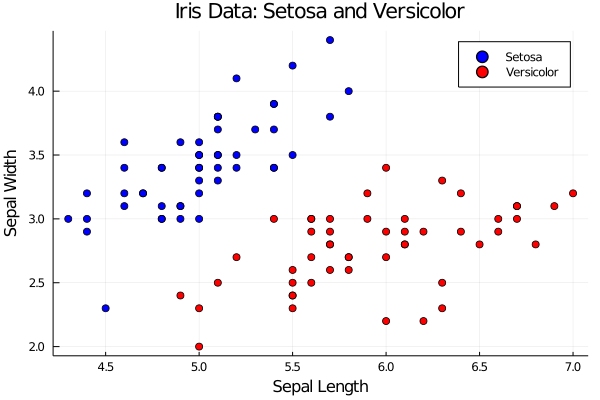

In [2]:
# access iris dataset 
iris = dataset("datasets", "iris")

# Pull the setosa and versicolor data 
x_data = [x for x in zip(iris.SepalLength[1:100], iris.SepalWidth[1:100])]

# Assign 1 for setosa or -1 for versicolor
y_data = [y == "setosa" ? 1 : -1 for y in iris.Species[1:100]]

# plotting setosa 
scatter(x_data[1:50],
        label = "Setosa",
        color = "blue",
        xaxis = "Sepal Length",
        yaxis = "Sepal Width",
        title = "Iris Data: Setosa and Versicolor")

# plotting versicolor 
scatter!(x_data[51:100],
        label = "Versicolor",
        color = "red")

In [ ]:
# Data exploration
#iris.Species[1:50] # setosa
#iris.Species[51:100] # versicolor

In [ ]:
# define sign function 
function sign(weights, x)
    x̄ = [1.0, x[1], x[2]]
    return weights'x̄ > 0 ? 1 : -1
end

In [ ]:
# define perceptron update rule function 
function perceptron_update_rule(weights, x, y)
    if sign(weights, x) != y
        weights += y*[1.0, x[1], x[2]]
    end
    
    return weights
end 

In [ ]:
# define PLA function 
function PLA(X, Y; epochs = 1000)
    w = randn(3)
    
    counter = 1
    while counter  < epochs
        for i = 1:length(X)
            w = perceptron_update_rule(w, X[i], Y[i])
        end
        counter += 1
    end
    
    return w
end

In [ ]:
w = PLA(x_data, y_data; epochs = 1000) # choose epochs = 1000 for more accuracy

In [ ]:
plot!([(x,(-w[2]*x - w[1]) / w[3]) for x = 4:7],
        label = "Learned split 1000")

In [ ]:
function predictor(weights, x)
    return sign(weights, x) == 1 ? "setosa" : "versicolor"
end

In [ ]:
k = rand(1:100)
println("Flower #", k)
println("The true label is: ", iris.Species[k])
println("The predicted label is: ", predictor(w, (iris.SepalLength[k], iris.SepalWidth[k])))

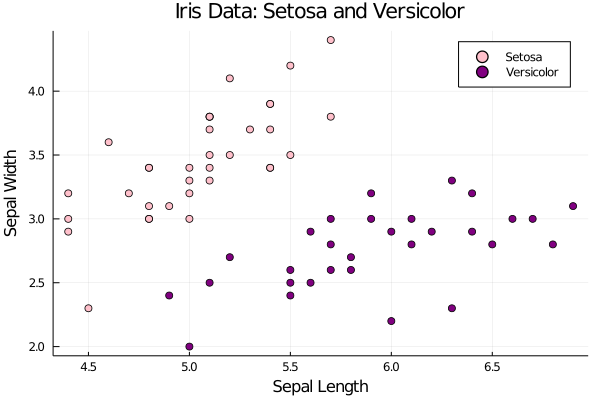

In [36]:
# pulled from web... split data into train and test sets
using Random
df = dataset("datasets", "iris")
iris = df[1:100, :]

sample = randsubseq(1:size(iris,1), 0.7)
train = iris[sample, :]
notsample = [i for i in 1:size(iris,1) if isempty(searchsorted(sample, i))]
test = iris[notsample, :]

# Pull the setosa and versicolor data 
x_train = [x for x in zip(train.SepalLength[1:nrow(train)], train.SepalWidth[1:nrow(train)])]
x_test = [x for x in zip(test.SepalLength[1:nrow(test)], test.SepalWidth[1:nrow(test)])]

# Assign 1 for setosa or -1 for versicolor
y_train = [y == "setosa" ? 1 : -1 for y in train.Species[1:nrow(train)]]
y_test = [y == "setosa" ? 1 : -1 for y in test.Species[1:nrow(test)]]

# plotting setosa 
scatter(x_train[1:35],
        label = "Setosa",
        color = "pink",
        xaxis = "Sepal Length",
        yaxis = "Sepal Width",
        title = "Iris Data: Setosa and Versicolor")

# plotting versicolor 
scatter!(x_train[36:length(x_train)],
        label = "Versicolor",
        color = "purple")

In [38]:
length(y_train)

65

1:0